In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Khám phá dữ liệu
df=pd.read_csv("Online Retail.csv")
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


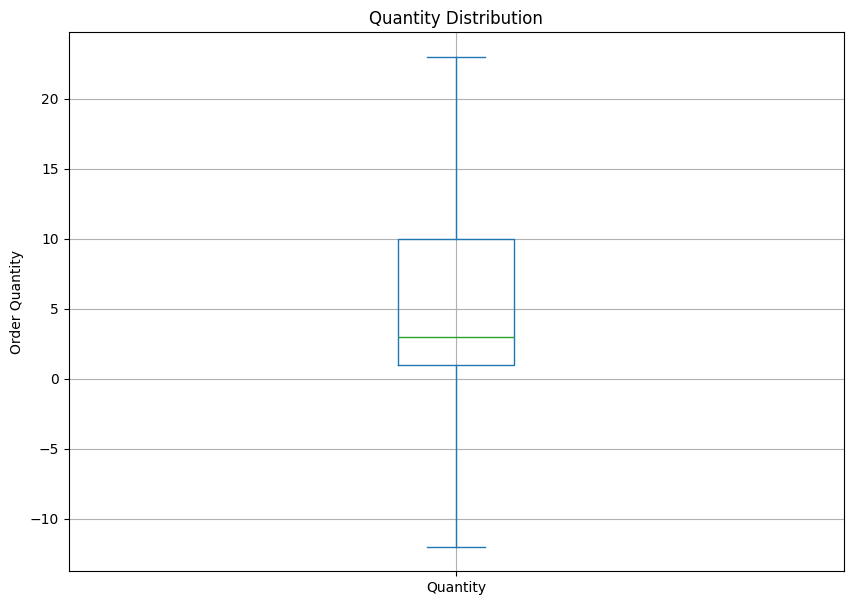

In [3]:
# vẽ biểu đồ boxplot để quan sát cột 
ax = df['Quantity'].plot.box(showfliers=False,
                             grid=True,
                             figsize=(10, 7)) 
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [4]:
# nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàng đã bị cancel, InvoiceNo có chữ "c")
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom


In [5]:
#loại bỏ những đơn hàng đã bị hủy
df = df[df['Quantity']>0]
print(df[df['UnitPrice']<=0].head())
df = df[df['UnitPrice']>0]

     InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  01/12/2010 11:52        0.0   
1970    536545     21134         NaN         1  01/12/2010 14:32        0.0   
1971    536546     22145         NaN         1  01/12/2010 14:33        0.0   
1972    536547     37509         NaN         1  01/12/2010 14:33        0.0   
1987    536549    85226A         NaN         1  01/12/2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  


In [7]:
# chuyển cột "InvoiceDate" sang định dạng date time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print(df["InvoiceDate"].min(), df["InvoiceDate"].max())

ValueError: time data "13/12/2010 9:02" doesn't match format "%m/%d/%Y %H:%M", at position 867. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.